## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [7]:
nhanes_raw = nhanes.load.load_NHANES_data(year='2017-2018').clean_names(case_type = 'snake')
nhanes_raw

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


## Procesar los datos de NHANES

In [21]:
dfnhanes = nhanes_raw.select_columns('general_health_condition','age_in_years_at_screening',
                        'gender','current_selfreported_height_inches',
                        'current_selfreported_weight_pounds','doctor_told_you_have_diabetes',
                        '60_sec_pulse30_sec_pulse2','total_cholesterol_mgdl').rename_columns({'age_in_years_at_screening':'age',
                                                                                              'current_selfreported_height_inches':'height',
                                                                                              'current_selfreported_weight_pounds':'weight',
                                                                                              'doctor_told_you_have_diabetes':'diabetes',
                                                                                              '60_sec_pulse30_sec_pulse2':'pulse',
                                                                                              'total_cholesterol_mgdl':'cholesterol'}).replace({'height':{9999:np.nan,7777:np.nan},
                                                                                                                                               'weight':{9999:np.nan,7777:np.nan},
                                                                                                                                               'diabetes':{'Borderline':np.nan}}).missing.sort_variables_by_missingness().dropna(subset = ['diabetes'],
                                                                                                                                               how = 'any').transform_column(column_name='diabetes',
                                                                                                                                               function = lambda s: s.astype(int),
                                                                                                                                               elementwise = False)
dfnhanes

,height,weight,general_health_condition,cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


In [22]:
dfnhanes.describe()

,height,weight,cholesterol,pulse,diabetes,age
count,5488.000000,5553.000000,6565.000000,6570.000000,8187.000000,8187.000000
mean,66.256560,178.462993,179.673420,73.823135,0.104190,35.405032
std,4.157128,48.491693,40.544395,12.408720,0.305525,24.859200
min,49.000000,72.000000,76.000000,34.000000,0.000000,1.000000
25%,63.000000,145.000000,150.000000,66.000000,0.000000,12.000000
50%,66.000000,170.000000,175.000000,72.000000,0.000000,32.000000
75%,69.000000,205.000000,204.000000,82.000000,0.000000,58.000000
max,82.000000,484.000000,446.000000,136.000000,1.000000,80.000000


## Visualizar los valores faltantes

<AxesSubplot: >

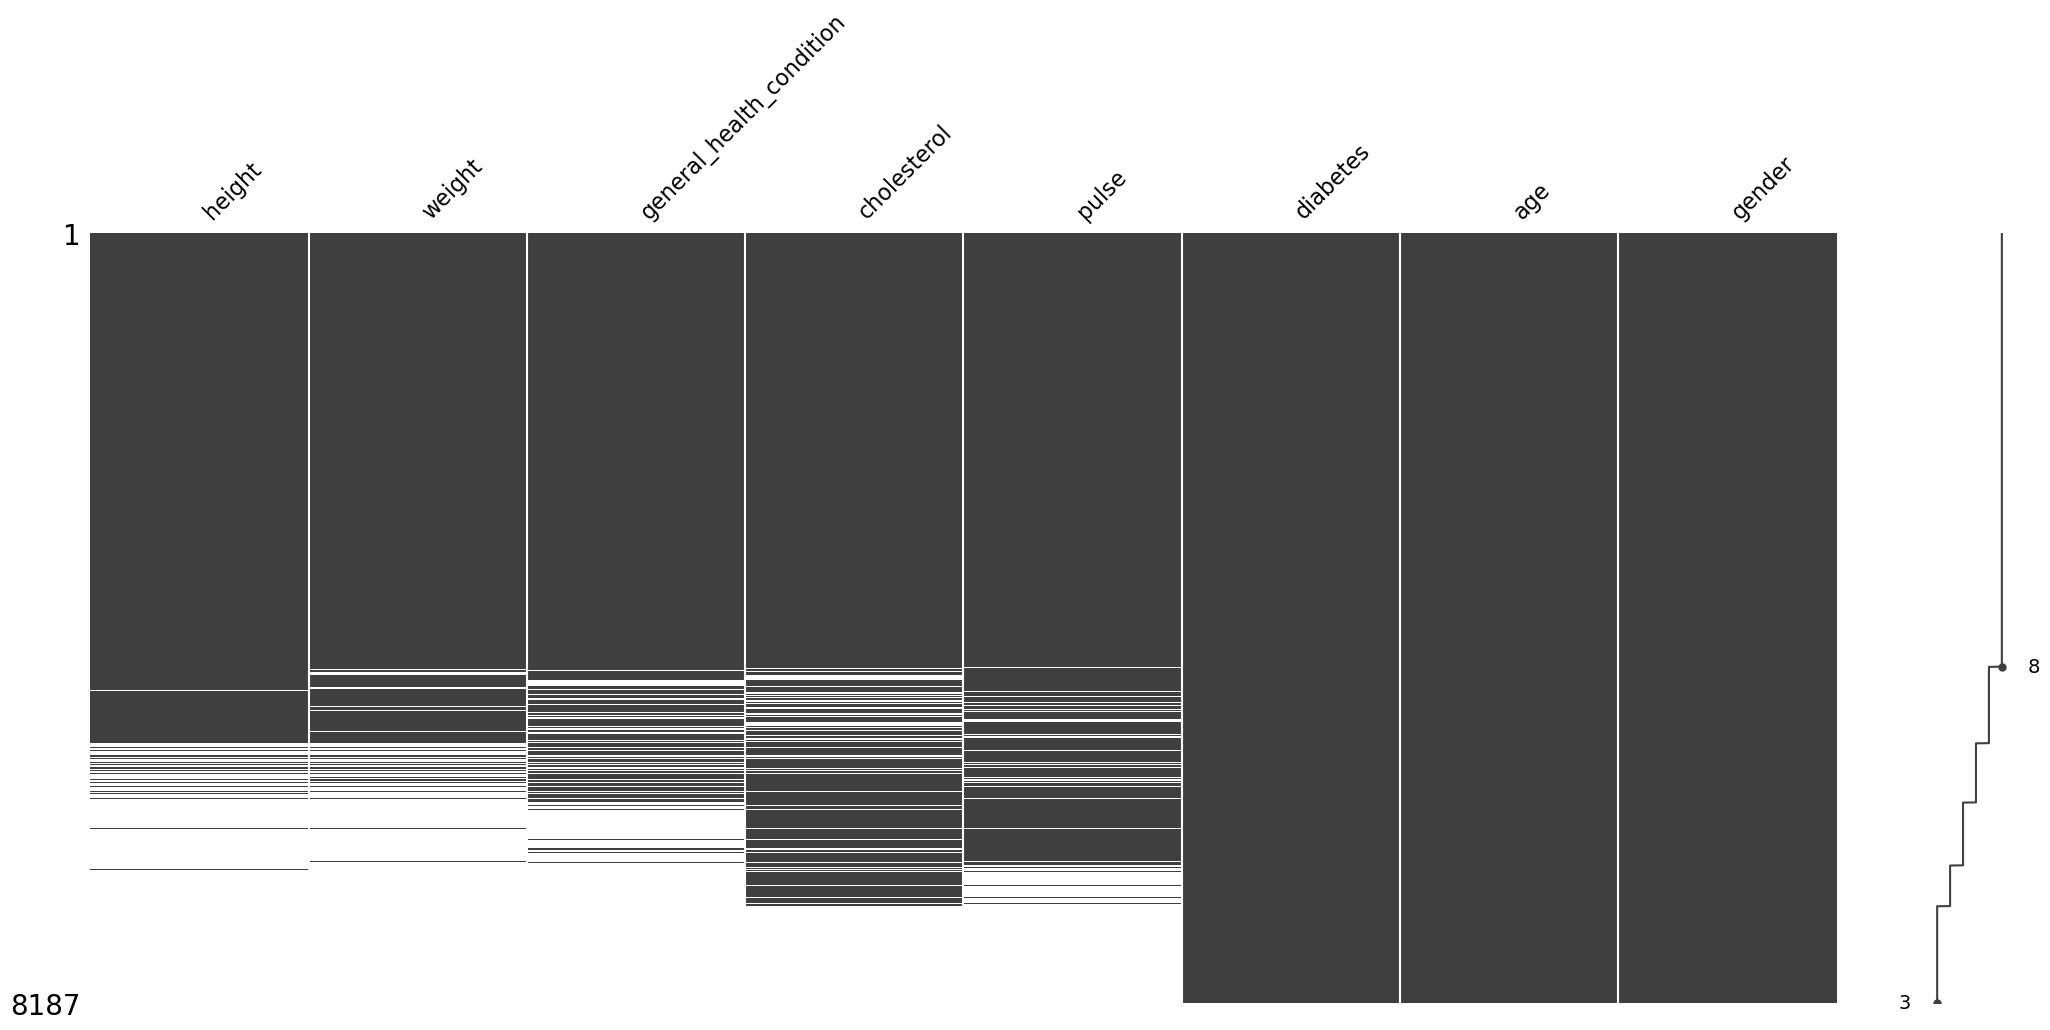

In [26]:
missingno.matrix(df=dfnhanes,sort='descending')

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

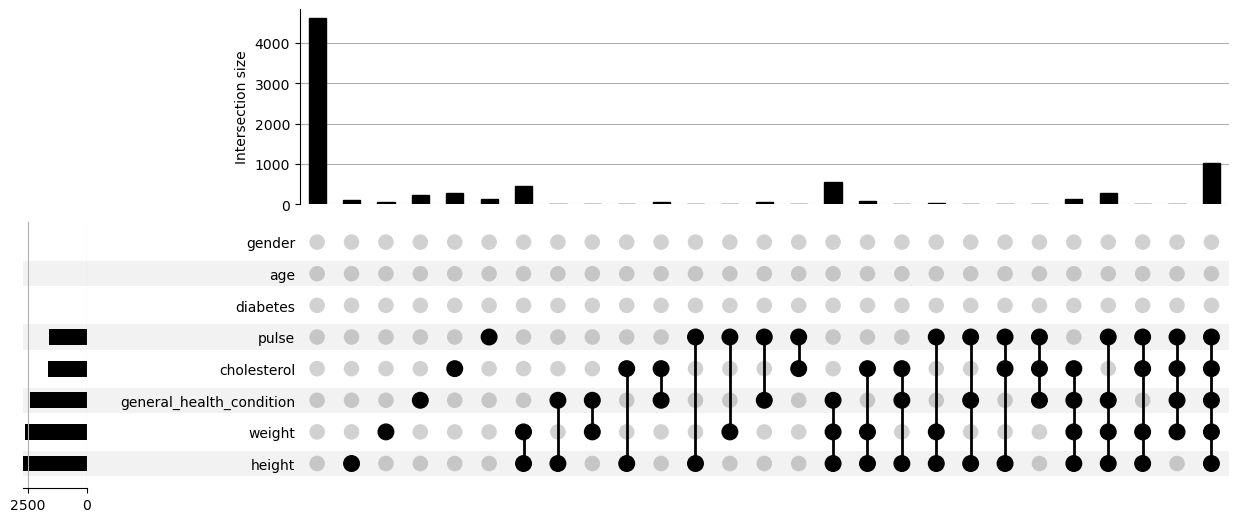

In [27]:
dfnhanes.missing.sort_variables_by_missingness().missing.missing_upsetplot()

In [34]:
dfnhanes = dfnhanes.dropna(subset=['pulse','cholesterol','general_health_condition','height','weight'],
               how='all').missing.sort_variables_by_missingness()
dfnhanes

,height,weight,general_health_condition,cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
93709.0,62.0,200.0,NaN,176.0,74.0,0,75.0,Female
93711.0,69.0,142.0,Very good,238.0,62.0,0,56.0,Male
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,33.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


<AxesSubplot: >

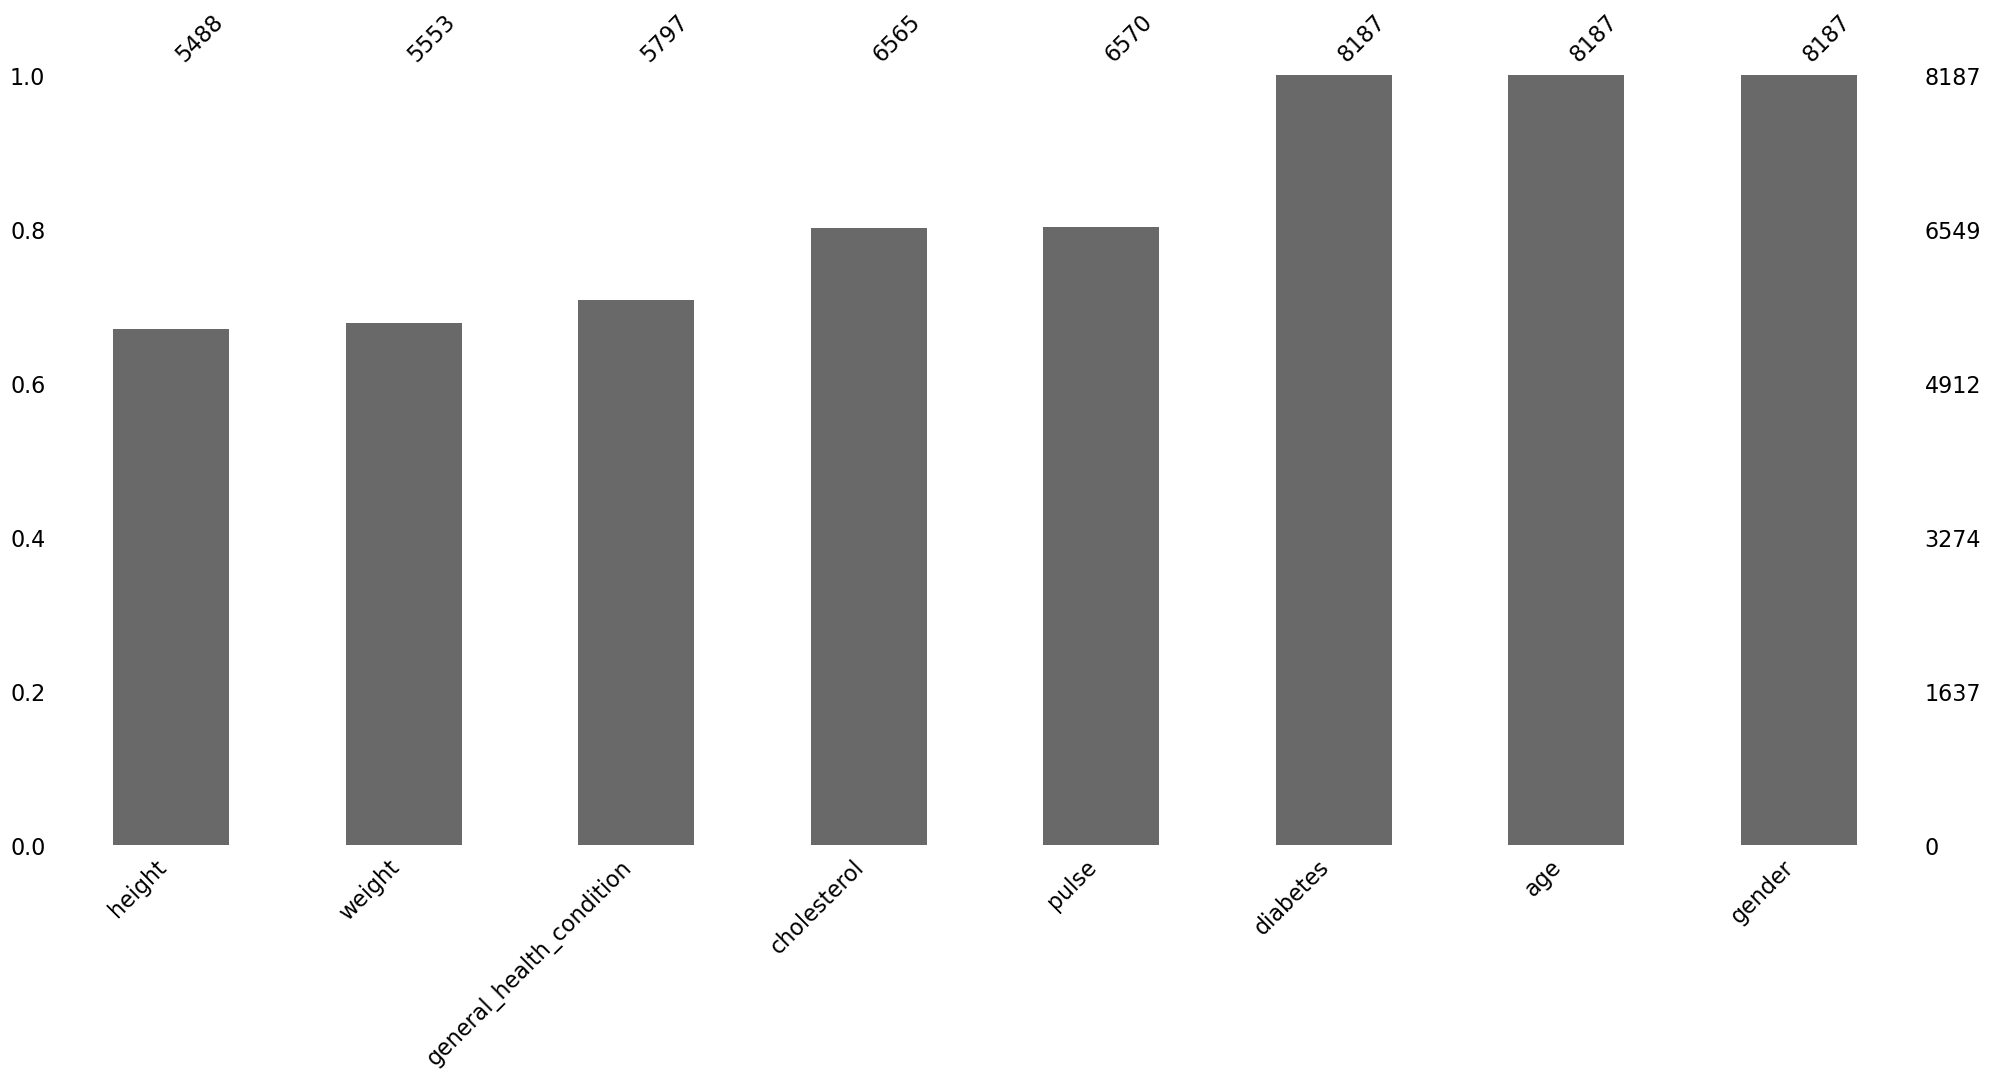

In [24]:
missingno.bar(df= dfnhanes)

## Eliminar valores faltantes